In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#!conda install --yes anaconda netcdf4

In [3]:
#Este no me ha dejado instalarlo desde aquí y lo he instalado desde el terminal
#!conda install --yes conda-forge basemap-data-hires

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

In [2]:
my_example_nc_file = '/Users/aitorizquierdo/Desktop/air-quality-madrid/sentinel/S5P_OFFL_L2__NO2____20190108T111459_20190108T125629_06414_01_010202_20190114T133207.nc'

In [3]:
from netCDF4 import Dataset
import numpy as np

In [4]:
fh = Dataset(my_example_nc_file, mode='r')

In [5]:
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: ad305a49-6ac9-4734-9157-64ba8e60480a
    id: S5P_OFFL_L2__NO2____20190108T111459_20190108T125629_06414_01_010202_20190114T133207
    time_reference: 2019-01-08T00:00:00Z
    time_reference_days_since_1950: 25209
    time_reference_julian_day: 2458491.5
    time_reference_seconds_since_1970: 1546905600
    time_coverage_start: 2019-01-08T11:36:34Z
    time_coverage_end: 2019-01-08T12:34:57Z
    time_coverage_duration: PT3503.000S
    time_coverage_resolution: PT1.080S
    orbit: 6414
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.2.2
    keywords_vocabulary: AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
    keywords: 0345 Pollution, U

In [6]:
print (fh.groups)

print (fh.groups['PRODUCT'])

OrderedDict([('PRODUCT', <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3245), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixe

In [7]:
print (fh.groups['PRODUCT'].variables.keys())

odict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [8]:
fh.groups['PRODUCT'].variables['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 2010-01-01 00:00:00
    standard_name: time
    axis: T
    long_name: reference time for the measurements
    comment: The time in this variable corresponds to the time in the time_reference global attribute
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (1,)
filling on

In [9]:
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)

no2[fh.groups['PRODUCT'].variables['qa_value'][0,:,:]<0.75]=np.nan
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units

(3245, 450)
(3245, 450)


In [13]:
test = no2[fh.groups['PRODUCT'].variables['qa_value'][0,:,:]<0.75]=np.nan

In [16]:
test = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']

In [20]:
h = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']

In [21]:
times = fh.groups['PRODUCT'].variables['time']

In [23]:
import netCDF4

In [24]:
jd = netCDF4.num2date(times[:],times.units)

In [31]:
h

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide
    long_name: Tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    ancillary_variables: nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel
    multiplication_factor_to_convert_to_molecules_percm2: 6.02214e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245, 450)
filling on

In [28]:
hs = pd.Series(h[:,0],index=jd)

Exception: Data must be 1-dimensional

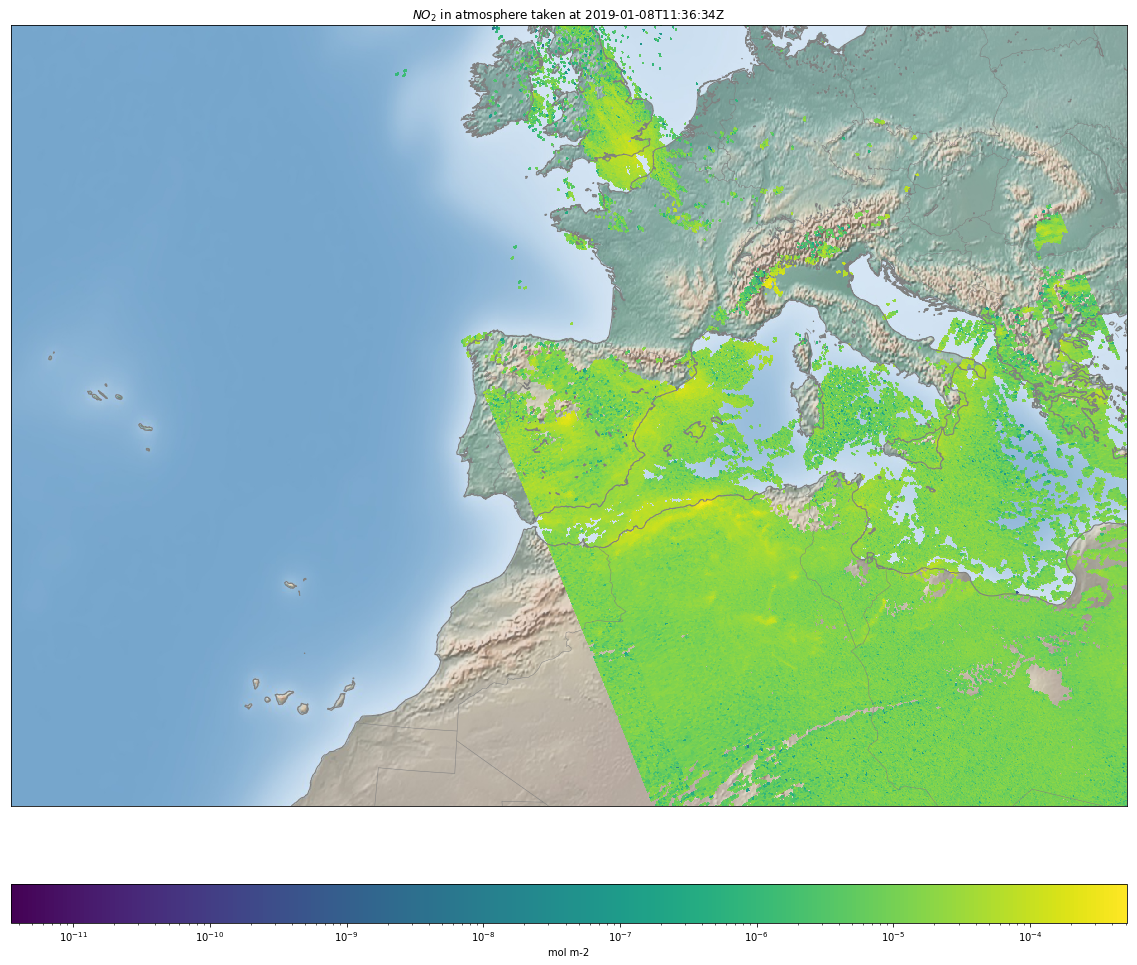

In [6]:
#my_example_nc_file = './data/NO2/S5P_NRTI_L2__NO2____20180813T133935_20180813T134435_04316_01_010100_20180813T142038.nc'
fh = Dataset(my_example_nc_file, mode='r')
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]


no2[fh.groups['PRODUCT'].variables['qa_value'][0,:,:]<0.75]=np.nan
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units
from matplotlib.colors import LogNorm
#lon_0 = lons.mean()
#lat_0 = lats.mean()
lat_0 = 40.415363
lon_0 = -3.707398

# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=lat_0, lon_0=lon_0,
            width=5000000,height=3500000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

xi, yi = m(lons, lats)
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='viridis')
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title(r'$NO_2$ in atmosphere taken at '+fh.groups['METADATA'].groups['GRANULE_DESCRIPTION'].GranuleStart)
plt.show()

In [7]:
a_test = np.squeeze(no2)

In [8]:
a_test

masked_array(
  data=[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=9.96921e+36,
  dtype=float32)

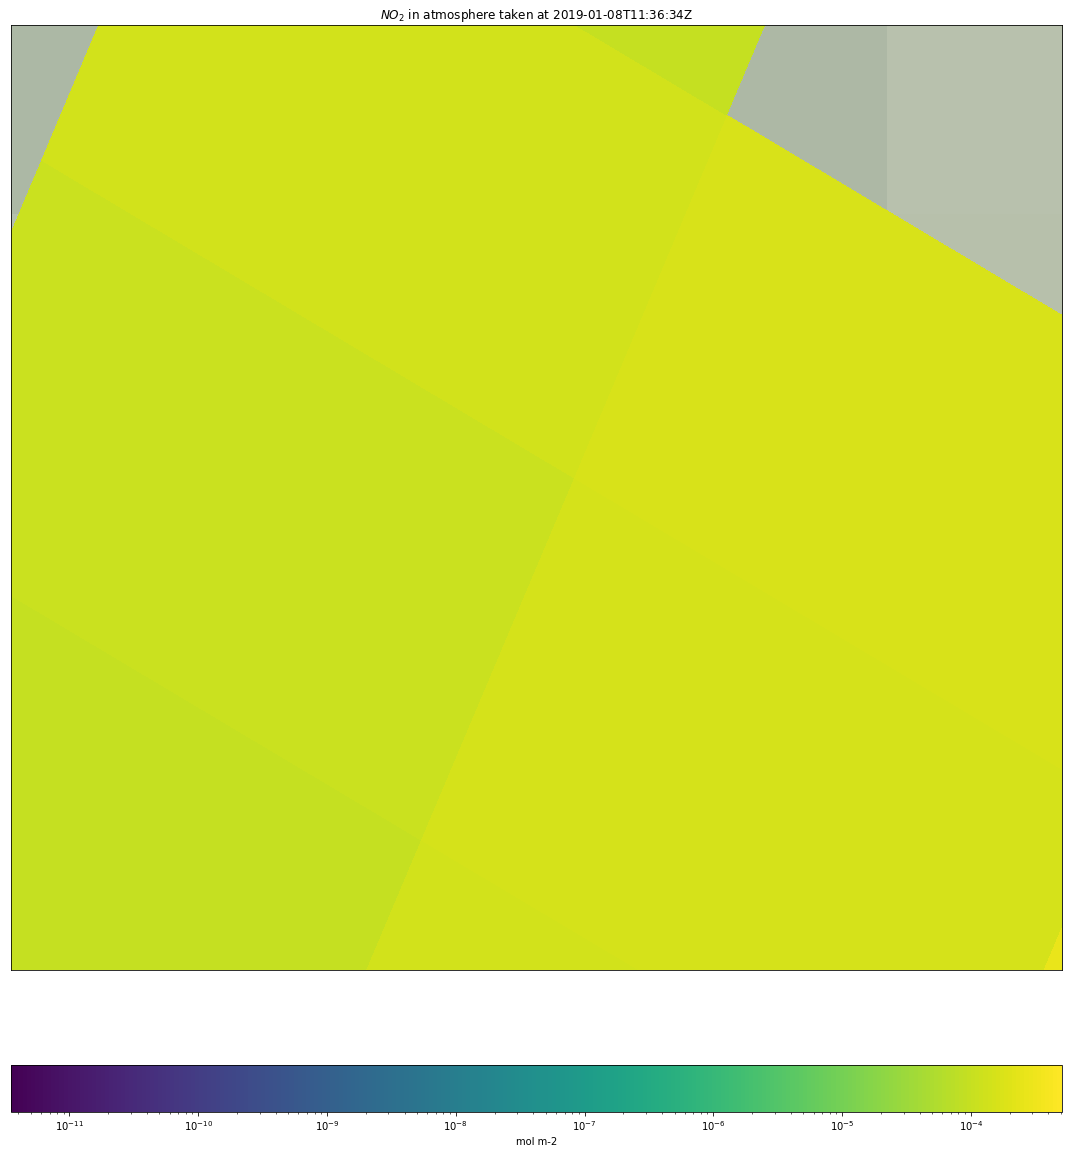

In [35]:
#my_example_nc_file = './data/NO2/S5P_NRTI_L2__NO2____20180813T133935_20180813T134435_04316_01_010100_20180813T142038.nc'
fh = Dataset(my_example_nc_file, mode='r')
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]


no2[fh.groups['PRODUCT'].variables['qa_value'][0,:,:]<0.75]=np.nan
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units
from matplotlib.colors import LogNorm

lat_0 = 40.415363
lon_0 = -3.707398
llcrnrlat = 40.341741 # lat lower left hand corner
llcrnrlon = -3.3814703 # lon lower left hand corner
urcrnrlat = 40.498136 # lat upper right hand corner
urcrnrlon = -3.608795 # lon upper right hand corner

# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='h',
            lat_0=lat_0, lon_0=lon_0,
            llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

xi, yi = m(lons, lats)
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='viridis')
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title(r'$NO_2$ in atmosphere taken at '+fh.groups['METADATA'].groups['GRANULE_DESCRIPTION'].GranuleStart)
plt.show()

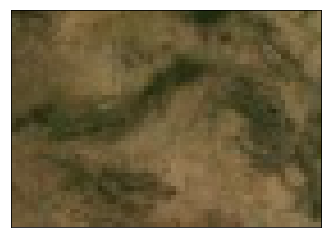

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='lcc', resolution='f',
            lat_0=lat_0, lon_0=lon_0,
            llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
 
m.bluemarble()
plt.show()

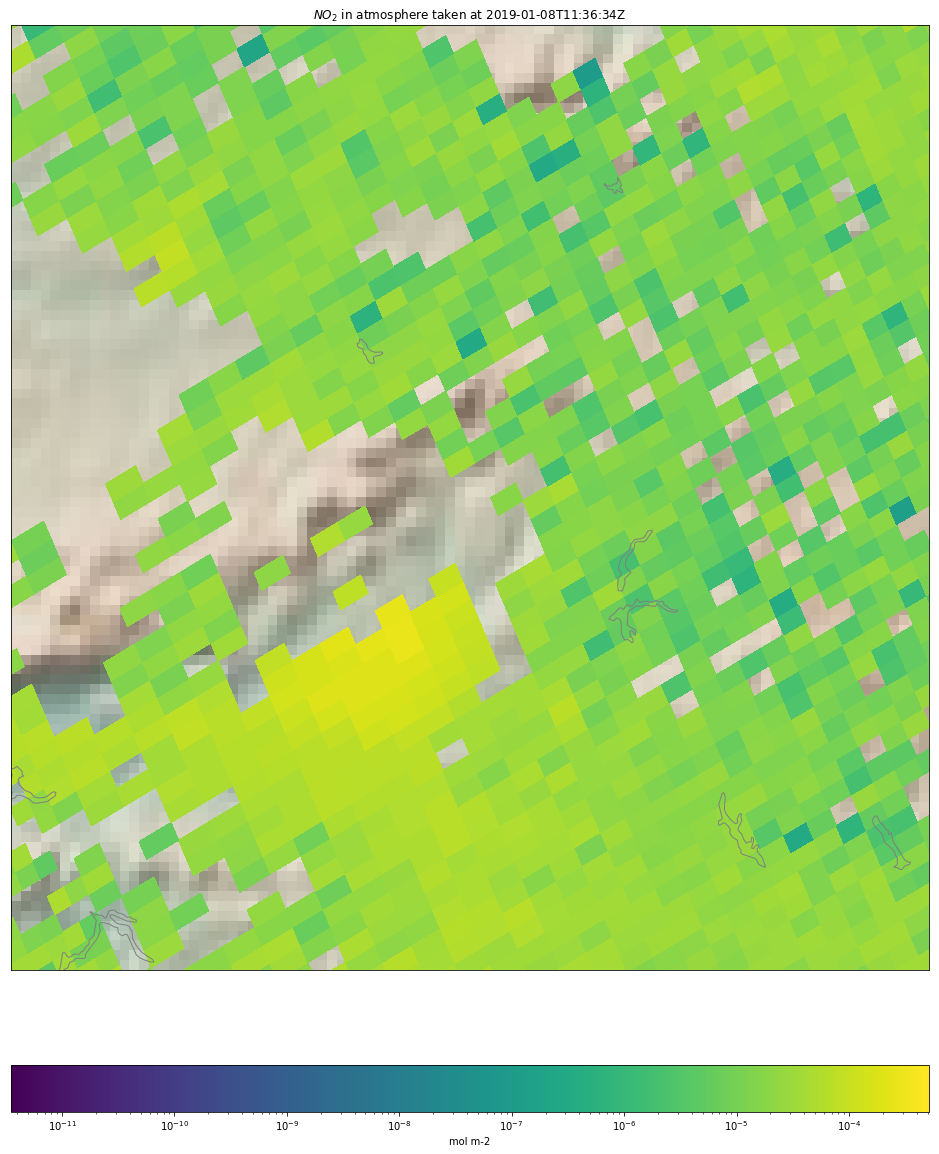

In [37]:
#my_example_nc_file = './data/NO2/S5P_NRTI_L2__NO2____20180813T133935_20180813T134435_04316_01_010100_20180813T142038.nc'
fh = Dataset(my_example_nc_file, mode='r')
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]


no2[fh.groups['PRODUCT'].variables['qa_value'][0,:,:]<0.75]=np.nan
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units
from matplotlib.colors import LogNorm

lat_0 = 40.415363
lon_0 = -3.707398
llcrnrlat = 39.212884 # lat lower left hand corner
llcrnrlon = -5.390173 # lon lower left hand corner
urcrnrlat = 42.385115 # lat upper right hand corner
urcrnrlon = -1.287889 # lon upper right hand corner

# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='h',
            lat_0=lat_0, lon_0=lon_0,
            llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

xi, yi = m(lons, lats)
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='viridis')
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title(r'$NO_2$ in atmosphere taken at '+fh.groups['METADATA'].groups['GRANULE_DESCRIPTION'].GranuleStart)
plt.show()

In [14]:
lons

masked_array(
  data=[[-142.10825 , -142.26225 , -142.41422 , ...,  178.39062 ,
          178.29259 ,  178.1934  ],
        [-142.10646 , -142.26071 , -142.4129  , ...,  178.33905 ,
          178.24095 ,  178.14172 ],
        [-142.10437 , -142.25885 , -142.41129 , ...,  178.28757 ,
          178.18942 ,  178.09015 ],
        ...,
        [ -54.52469 ,  -54.4739  ,  -54.423454, ...,   36.783745,
           37.255337,   37.728806],
        [ -54.682148,  -54.63188 ,  -54.581955, ...,   36.92998 ,
           37.40388 ,   37.879623],
        [ -54.839745,  -54.790005,  -54.7406  , ...,   37.07953 ,
           37.555763,   38.033787]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [16]:
import pandas as pd

In [19]:
df = pd.DataFrame(np.ma.filled(lons))

In [24]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,-142.108246,-142.262253,-142.414215,-142.564178,-142.712189,-142.858322,-143.002609,-143.145081,-143.285812,-143.424820,...,179.047668,178.956772,178.864929,178.772110,178.678299,178.583466,178.487579,178.390625,178.292587,178.193405
1,-142.106461,-142.260712,-142.412903,-142.563095,-142.711349,-142.857712,-143.002213,-143.144928,-143.285873,-143.425095,...,178.996429,178.905487,178.813583,178.720718,178.626862,178.531982,178.436050,178.339050,178.240952,178.141724
2,-142.104370,-142.258850,-142.411285,-142.561722,-142.710205,-142.856796,-143.001541,-143.144470,-143.285645,-143.425095,...,178.945267,178.854279,178.762344,178.669434,178.575516,178.480591,178.384613,178.287567,178.189423,178.090149
3,-142.102371,-142.257095,-142.409775,-142.560455,-142.709167,-142.855988,-143.000961,-143.144119,-143.285522,-143.425201,...,178.893906,178.802872,178.710876,178.617920,178.523956,178.428986,178.332962,178.235870,178.137680,178.038361
4,-142.100616,-142.255585,-142.408493,-142.559402,-142.708359,-142.855408,-143.000610,-143.143997,-143.285614,-143.425507,...,178.842209,178.751114,178.659073,178.566071,178.472061,178.377029,178.280960,178.183807,178.085571,177.986206


In [21]:
df2 = pd.DataFrame(np.ma.filled(lats))

In [23]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,-55.856110,-55.869850,-55.883205,-55.896191,-55.908817,-55.921097,-55.933041,-55.944656,-55.955956,-55.966949,...,-49.435677,-49.387691,-49.339027,-49.289669,-49.239597,-49.188797,-49.137241,-49.084915,-49.031799,-48.977867
1,-55.917236,-55.931011,-55.944401,-55.957420,-55.970081,-55.982391,-55.994362,-56.006008,-56.017334,-56.028355,...,-49.490913,-49.442879,-49.394169,-49.344761,-49.294640,-49.243786,-49.192181,-49.139805,-49.086632,-49.032646
2,-55.978374,-55.992188,-56.005611,-56.018661,-56.031353,-56.043694,-56.055698,-56.067371,-56.078728,-56.089779,...,-49.546158,-49.498074,-49.449314,-49.399860,-49.349689,-49.298786,-49.247131,-49.194702,-49.141479,-49.087440
3,-56.039497,-56.053345,-56.066803,-56.079887,-56.092609,-56.104980,-56.117016,-56.128719,-56.140106,-56.151184,...,-49.601307,-49.553177,-49.504368,-49.454861,-49.404644,-49.353687,-49.301983,-49.249500,-49.196224,-49.142136
4,-56.100624,-56.114502,-56.127995,-56.141109,-56.153866,-56.166267,-56.178333,-56.190067,-56.201481,-56.212585,...,-49.656425,-49.608250,-49.559391,-49.509834,-49.459564,-49.408558,-49.356800,-49.304268,-49.250938,-49.196793
